In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('train.csv', engine='python')
test = pd.read_csv('test.csv', engine='python')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
def barh_chart(feat):
    survived = train[train['Survived']==1][feat].value_counts() #count survived people
    dead = train[train['Survived']==0][feat].value_counts() #count dead people
    df = pd.DataFrame([survived,dead]) 
    df.index = ['Survived','Dead']
    df.plot(kind='barh',stacked=True, figsize=(10,5))

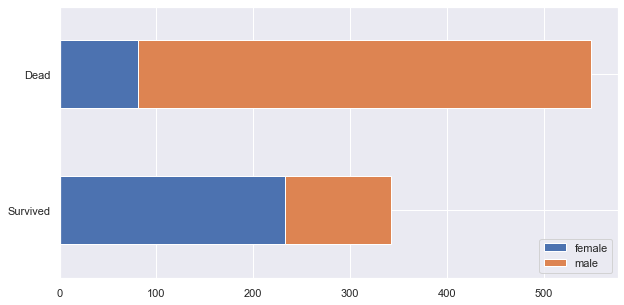

In [9]:
barh_chart('Sex')

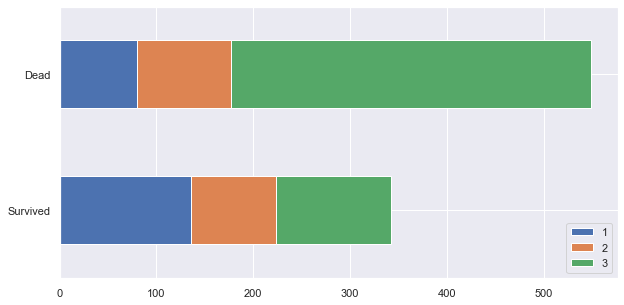

In [10]:
barh_chart('Pclass')

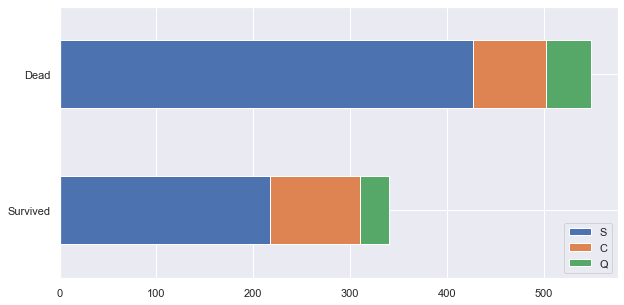

In [11]:
barh_chart('Embarked')

In [12]:
datas = [train,test]

In [13]:
for data in datas:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [14]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Jonkheer      1
Mme           1
Don           1
Ms            1
Sir           1
Capt          1
Lady          1
Name: Title, dtype: int64

In [15]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for data in datas:
    data['Title'] = data['Title'].map(title_mapping)

In [16]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

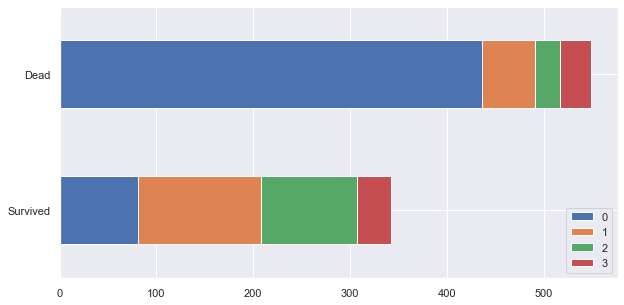

In [17]:
barh_chart('Title')

In [18]:
sex_mapping = {"male": 0, "female": 1}
for data in datas:
    data['Sex'] = data['Sex'].map(sex_mapping)

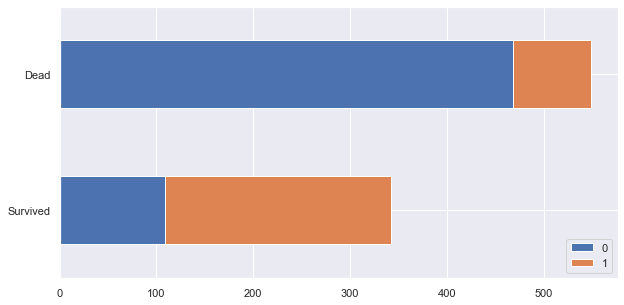

In [19]:
barh_chart('Sex')

In [20]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [21]:
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [22]:
for data in datas:
    data.loc[ data['Age'] <= 10, 'Age'] = 0,
    data.loc[(data['Age'] > 10) & (data['Age'] <= 20), 'Age'] = 1,
    data.loc[(data['Age'] > 20) & (data['Age'] <= 30), 'Age'] = 2,
    data.loc[(data['Age'] > 30) & (data['Age'] <= 40), 'Age'] = 3,
    data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'Age'] = 4,
    data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'Age'] = 5,
    data.loc[(data['Age'] > 60) & (data['Age'] <= 70), 'Age'] = 6,
    data.loc[(data['Age'] > 70) & (data['Age'] <= 80), 'Age'] = 7
    

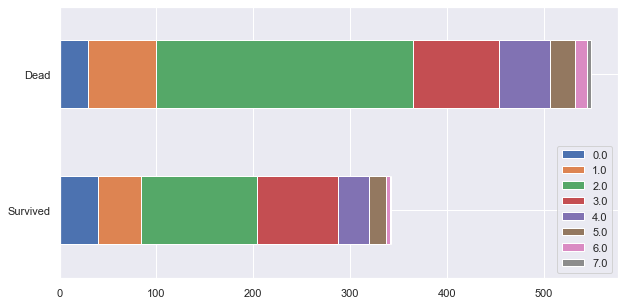

In [23]:
barh_chart('Age')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,0


In [25]:
P1 = train[train['Pclass']==1]['Embarked'].value_counts()
P2 = train[train['Pclass']==2]['Embarked'].value_counts()
P3 = train[train['Pclass']==3]['Embarked'].value_counts()

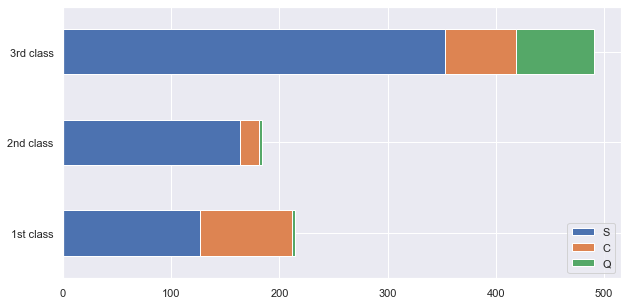

In [26]:
df = pd.DataFrame([P1, P2, P3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='barh',stacked=True, figsize=(10,5))

In [27]:
for data in datas: #fill Nan value with 'S'
    data['Embarked'] = data['Embarked'].fillna('S')

In [28]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for data in datas:
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [29]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [30]:
for data in datas:
    data.loc[ data['Fare'] <= 17, 'Fare'] = 0,
    data.loc[(data['Fare'] > 17) & (data['Fare'] <= 30), 'Fare'] = 1,
    data.loc[(data['Fare'] > 30) & (data['Fare'] <= 100), 'Fare'] = 2,
    data.loc[ data['Fare'] > 100, 'Fare'] = 3

In [31]:
for data in datas:
    data['Cabin'] = data['Cabin'].str[:1]

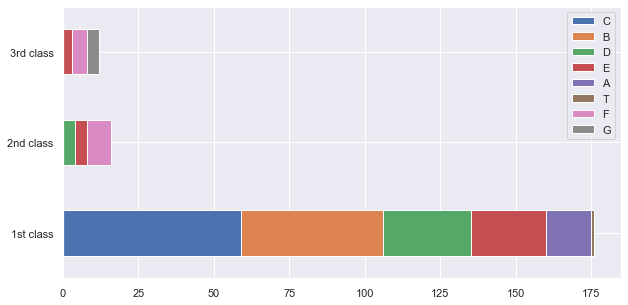

In [32]:
P1 = train[train['Pclass']==1]['Cabin'].value_counts() 
P2 = train[train['Pclass']==2]['Cabin'].value_counts() 
P3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([P1, P2, P3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='barh',stacked=True, figsize=(10,5))

In [33]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for data in datas:
    data['Cabin'] = data['Cabin'].map(cabin_mapping) #mapping cabin col

In [34]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [35]:
train["FamilyNum"] = train["SibSp"] + train["Parch"] 
test["FamilyNum"] = test["SibSp"] + test["Parch"]  

In [36]:
#drop ticket, sibsp, parch
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1) #인덱스 필요없음 

In [37]:
train_x = train.drop('Survived', axis=1)
train_y = train['Survived']

train_x.shape, train_y.shape #using survived col as target

((891, 8), (891,))

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) #10개의 fold로 나눈다

In [40]:
clf = KNeighborsClassifier(n_neighbors = 10)  
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score) 

[0.8        0.82022472 0.80898876 0.80898876 0.88764045 0.82022472
 0.82022472 0.78651685 0.79775281 0.80898876]


In [41]:
# kNN Score
round(np.mean(score)*100, 2) 

81.6

In [42]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.81111111 0.80898876 0.7752809  0.79775281 0.83146067 0.78651685
 0.78651685 0.83146067 0.74157303 0.79775281]


In [44]:
# decision tree Score
round(np.mean(score)*100, 2)

79.68

In [45]:
clf = RandomForestClassifier(n_estimators=10)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.81111111 0.84269663 0.75280899 0.80898876 0.86516854 0.83146067
 0.80898876 0.7752809  0.74157303 0.82022472]


In [47]:
# Random forest tree Score
round(np.mean(score)*100, 2)

80.58

In [48]:
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [49]:
score = cross_val_score(xgb, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.82222222 0.83146067 0.79775281 0.80898876 0.85393258 0.80898876
 0.83146067 0.80898876 0.85393258 0.86516854]


In [50]:
round(np.mean(score)*100, 2)

82.83

In [51]:
xgb.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
test_data = test.drop("PassengerId", axis=1).copy()


In [53]:
pred_y = xgb.predict(test_data) 
pred_y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [54]:
import collections, numpy

collections.Counter(pred_y)

Counter({0: 271, 1: 147})

In [55]:
submission = pd.DataFrame({
  "PassengerId": test["PassengerId"],"Survived": pred_y
})

submission.to_csv('submission_rf.csv', index=False)